In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_weather = pd.read_csv ('C:/Users/WW/Documents/intern/DS Project/datasets 2/weather.csv')
df_electricity = pd.read_csv ('C:/Users/WW/Documents/intern/DS Project/datasets 2/electricity.csv')
df_gdp = pd.read_csv ('C:/Users/WW/Documents/intern/DS Project/datasets 2/gdp.csv')

## Data cleaning

#### weather

In [3]:
df_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
df_weather.shape

(15341, 10)

In [5]:
pd.isnull(df_weather).sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [6]:
df_weather1 = df_weather.drop(['max_temp','min_temp','snow_depth'],axis='columns')
df_weather1.head()

,date,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure
0,19790101,2.0,7.0,52.0,-4.1,0.4,101900.0
1,19790102,6.0,1.7,27.0,-2.6,0.0,102530.0
2,19790103,5.0,0.0,13.0,-2.8,0.0,102050.0
3,19790104,8.0,0.0,13.0,-2.6,0.0,100840.0
4,19790105,6.0,2.0,29.0,-0.8,0.0,102250.0


In [7]:
df_weather2=df_weather1.dropna()  #drop null values
df_weather2.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
mean_temp           0
precipitation       0
pressure            0
dtype: int64

In [8]:
df_weather2.head()

,date,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure
0,19790101,2.0,7.0,52.0,-4.1,0.4,101900.0
1,19790102,6.0,1.7,27.0,-2.6,0.0,102530.0
2,19790103,5.0,0.0,13.0,-2.8,0.0,102050.0
3,19790104,8.0,0.0,13.0,-2.6,0.0,100840.0
4,19790105,6.0,2.0,29.0,-0.8,0.0,102250.0


In [9]:
# Convert the 'date_column' to a string
df_weather2['date'] = df_weather2['date'].astype(str)

# Extract the year and month
df_weather2['year'] = df_weather2['date'].str[:4]
df_weather2['month'] = df_weather2['date'].str[4:6]

# Convert the 'year' and 'month' columns to integers
df_weather2['year'] = df_weather2['year'].astype(int)
df_weather2['month'] = df_weather2['month'].astype(int)

# Display the modified DataFrame
df_weather2.head()


C:\Users\WW\AppData\Local\Temp\ipykernel_5720\518029464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather2['date'] = df_weather2['date'].astype(str)
C:\Users\WW\AppData\Local\Temp\ipykernel_5720\518029464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather2['year'] = df_weather2['date'].str[:4]
C:\Users\WW\AppData\Local\Temp\ipykernel_5720\518029464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,date,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,year,month
0,19790101,2.0,7.0,52.0,-4.1,0.4,101900.0,1979,1
1,19790102,6.0,1.7,27.0,-2.6,0.0,102530.0,1979,1
2,19790103,5.0,0.0,13.0,-2.8,0.0,102050.0,1979,1
3,19790104,8.0,0.0,13.0,-2.6,0.0,100840.0,1979,1
4,19790105,6.0,2.0,29.0,-0.8,0.0,102250.0,1979,1


In [10]:
# Reorder columns
df_weather2 = df_weather2[['year', 'month'] + [col for col in df_weather2.columns if col not in ['year', 'month']]]

# Display the modified DataFrame
df_weather2.head()


,year,month,date,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure
0,1979,1,19790101,2.0,7.0,52.0,-4.1,0.4,101900.0
1,1979,1,19790102,6.0,1.7,27.0,-2.6,0.0,102530.0
2,1979,1,19790103,5.0,0.0,13.0,-2.8,0.0,102050.0
3,1979,1,19790104,8.0,0.0,13.0,-2.6,0.0,100840.0
4,1979,1,19790105,6.0,2.0,29.0,-0.8,0.0,102250.0


In [11]:
df_weather3 = df_weather2.drop(['date'],axis='columns')
df_weather3.head()

,year,month,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure
0,1979,1,2.0,7.0,52.0,-4.1,0.4,101900.0
1,1979,1,6.0,1.7,27.0,-2.6,0.0,102530.0
2,1979,1,5.0,0.0,13.0,-2.8,0.0,102050.0
3,1979,1,8.0,0.0,13.0,-2.6,0.0,100840.0
4,1979,1,6.0,2.0,29.0,-0.8,0.0,102250.0


In [12]:
df_weather3.shape

(15261, 8)

In [13]:
weather_monthly_averages = df_weather3.groupby(['year', 'month']).mean().reset_index()
weather_monthly_averages.head()

,year,month,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure
0,1979,1,5.724138,2.017241,29.965517,0.527586,2.058621,101120.689655
1,1979,2,6.360000,1.948000,45.440000,2.028000,1.744000,101061.600000
2,1979,3,5.967742,3.212903,93.354839,5.587097,3.061290,100459.032258
3,1979,4,6.133333,3.543333,134.166667,8.743333,2.586667,101165.333333
4,1979,5,5.290323,6.470968,204.064516,11.490323,2.806452,101362.580645


In [14]:
# Create a 'time' column by combining 'year' and 'month'
weather_monthly_averages['time'] = weather_monthly_averages['year'].astype(str) + '-' + weather_monthly_averages['month'].apply(lambda x: str(x).zfill(2))

# Reorder columns to place 'time' as the third column
weather_monthly_averages = weather_monthly_averages[['year', 'month', 'time'] + [col for col in weather_monthly_averages.columns if col not in ['year', 'month', 'time']]]

# Display the modified DataFrame
weather_monthly_averages.head()


,year,month,time,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure
0,1979,1,1979-01,5.724138,2.017241,29.965517,0.527586,2.058621,101120.689655
1,1979,2,1979-02,6.360000,1.948000,45.440000,2.028000,1.744000,101061.600000
2,1979,3,1979-03,5.967742,3.212903,93.354839,5.587097,3.061290,100459.032258
3,1979,4,1979-04,6.133333,3.543333,134.166667,8.743333,2.586667,101165.333333
4,1979,5,1979-05,5.290323,6.470968,204.064516,11.490323,2.806452,101362.580645


In [15]:
weather_monthly_averages.shape

(504, 9)

In [16]:
df_weather4 = weather_monthly_averages[(weather_monthly_averages['year'] >= 2010) & (weather_monthly_averages['year'] <= 2020)]
df_weather4.head()

,year,month,time,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure
372,2010,1,2010-01,5.548387,1.654839,27.354839,2.090323,1.670968,101529.677419
373,2010,2,2010-02,6.321429,1.667857,43.178571,4.357143,3.585714,100306.071429
374,2010,3,2010-03,4.967742,3.432258,95.870968,7.416129,1.283871,101654.193548
375,2010,4,2010-04,3.633333,6.723333,180.966667,10.726667,0.773333,101953.000000
376,2010,5,2010-05,4.677419,5.496774,191.096774,12.516129,0.664516,101739.032258


In [17]:
df_weather4.shape

(132, 9)

In [18]:
df_weather4

,year,month,time,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure
372,2010,1,2010-01,5.548387,1.654839,27.354839,2.090323,1.670968,101529.677419
373,2010,2,2010-02,6.321429,1.667857,43.178571,4.357143,3.585714,100306.071429
374,2010,3,2010-03,4.967742,3.432258,95.870968,7.416129,1.283871,101654.193548
375,2010,4,2010-04,3.633333,6.723333,180.966667,10.726667,0.773333,101953.000000
376,2010,5,2010-05,4.677419,5.496774,191.096774,12.516129,0.664516,101739.032258
...,...,...,...,...,...,...,...,...,...
499,2020,8,2020-08,5.066667,5.976667,208.100000,20.393333,1.873333,101219.333333
500,2020,9,2020-09,4.200000,6.540000,170.000000,16.616667,0.640000,101695.000000
501,2020,10,2020-10,5.733333,1.780000,70.533333,11.933333,4.773333,100794.333333
502,2020,11,2020-11,5.933333,1.716667,43.166667,9.806667,1.660000,101939.000000


In [19]:
df_weather4.shape

(132, 9)

In [20]:
print(df_weather4.dtypes)

year                  int64
month                 int64
time                 object
cloud_cover         float64
sunshine            float64
global_radiation    float64
mean_temp           float64
precipitation       float64
pressure            float64
dtype: object


#### electricity

In [21]:
df_electricity.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,23-Jun,Net Electricity Production,Electricity,22282.0467,GWh
1,Australia,23-Jun,Net Electricity Production,Total Combustible Fuels,14978.5124,GWh
2,Australia,23-Jun,Net Electricity Production,"Coal, Peat and Manufactured Gases",10409.2475,GWh
3,Australia,23-Jun,Net Electricity Production,Oil and Petroleum Products,368.6325,GWh
4,Australia,23-Jun,Net Electricity Production,Natural Gas,3936.5174,GWh


In [22]:
pd.isnull(df_electricity).sum()

Country     0
Time        0
Balance     0
Product     0
Value      10
Unit        0
dtype: int64

In [23]:
country_to_keep = 'United Kingdom'

# Filter the DataFrame to keep only rows where 'country' is 'United Kingdom'
df_electricity = df_electricity[df_electricity['Country'] == country_to_keep]

# Reset the index if needed
df_electricity.reset_index(drop=True, inplace=True)

In [24]:
df_electricity.head()

,Country,Time,Balance,Product,Value,Unit
0,United Kingdom,23-Jun,Net Electricity Production,Electricity,19582.1511,GWh
1,United Kingdom,23-Jun,Net Electricity Production,Nuclear,3254.0789,GWh
2,United Kingdom,23-Jun,Net Electricity Production,Total Combustible Fuels,9968.7148,GWh
3,United Kingdom,23-Jun,Net Electricity Production,"Coal, Peat and Manufactured Gases",146.0736,GWh
4,United Kingdom,23-Jun,Net Electricity Production,Oil and Petroleum Products,149.5468,GWh


In [25]:
df_electricity

,Country,Time,Balance,Product,Value,Unit
0,United Kingdom,23-Jun,Net Electricity Production,Electricity,19582.1511,GWh
1,United Kingdom,23-Jun,Net Electricity Production,Nuclear,3254.0789,GWh
2,United Kingdom,23-Jun,Net Electricity Production,Total Combustible Fuels,9968.7148,GWh
3,United Kingdom,23-Jun,Net Electricity Production,"Coal, Peat and Manufactured Gases",146.0736,GWh
4,United Kingdom,23-Jun,Net Electricity Production,Oil and Petroleum Products,149.5468,GWh
...,...,...,...,...,...,...
3151,United Kingdom,10-Jan,Total Imports,Electricity,140.7810,GWh
3152,United Kingdom,10-Jan,Total Exports,Electricity,870.7870,GWh
3153,United Kingdom,10-Jan,Used for pumped storage,Electricity,392.9420,GWh
3154,United Kingdom,10-Jan,Distribution Losses,Electricity,2691.4440,GWh


In [26]:
product_to_keep = 'Electricity'


df_electricity = df_electricity[df_electricity['Product'] == product_to_keep]


df_electricity.reset_index(drop=True, inplace=True)

In [27]:
df_electricity

,Country,Time,Balance,Product,Value,Unit
0,United Kingdom,23-Jun,Net Electricity Production,Electricity,19582.1511,GWh
1,United Kingdom,23-Jun,Total Imports,Electricity,2646.0400,GWh
2,United Kingdom,23-Jun,Total Exports,Electricity,621.4750,GWh
3,United Kingdom,23-Jun,Used for pumped storage,Electricity,80.0770,GWh
4,United Kingdom,23-Jun,Distribution Losses,Electricity,1845.5116,GWh
...,...,...,...,...,...,...
967,United Kingdom,10-Jan,Total Imports,Electricity,140.7810,GWh
968,United Kingdom,10-Jan,Total Exports,Electricity,870.7870,GWh
969,United Kingdom,10-Jan,Used for pumped storage,Electricity,392.9420,GWh
970,United Kingdom,10-Jan,Distribution Losses,Electricity,2691.4440,GWh


In [28]:
balance_to_keep = 'Net Electricity Production'


df_electricity = df_electricity[df_electricity['Balance'] == balance_to_keep]


df_electricity.reset_index(drop=True, inplace=True)

In [29]:
df_electricity

,Country,Time,Balance,Product,Value,Unit
0,United Kingdom,23-Jun,Net Electricity Production,Electricity,19582.1511,GWh
1,United Kingdom,23-May,Net Electricity Production,Electricity,19417.6008,GWh
2,United Kingdom,23-Apr,Net Electricity Production,Electricity,21772.7825,GWh
3,United Kingdom,23-Mar,Net Electricity Production,Electricity,23976.7458,GWh
4,United Kingdom,23-Feb,Net Electricity Production,Electricity,22919.7808,GWh
...,...,...,...,...,...,...
157,United Kingdom,10-May,Net Electricity Production,Electricity,28068.0960,GWh
158,United Kingdom,10-Apr,Net Electricity Production,Electricity,28804.3190,GWh
159,United Kingdom,10-Mar,Net Electricity Production,Electricity,33781.9690,GWh
160,United Kingdom,10-Feb,Net Electricity Production,Electricity,32911.5200,GWh


In [30]:
pd.isnull(df_electricity).sum()

Country    0
Time       0
Balance    0
Product    0
Value      0
Unit       0
dtype: int64

In [31]:
df_electricity1 = df_electricity.drop(['Country','Balance','Product','Unit'],axis='columns')
df_electricity1.head()

,Time,Value
0,23-Jun,19582.1511
1,23-May,19417.6008
2,23-Apr,21772.7825
3,23-Mar,23976.7458
4,23-Feb,22919.7808


In [32]:
df_electricity2 = df_electricity1.copy()

df_electricity2['year'] = df_electricity2['Time'].str.split('-').str[0].astype(int)
df_electricity2['month'] = pd.to_datetime(df_electricity2['Time'], format='%d-%b').dt.month.astype(str).str.zfill(2)

df_electricity2.head()

,Time,Value,year,month
0,23-Jun,19582.1511,23,06
1,23-May,19417.6008,23,05
2,23-Apr,21772.7825,23,04
3,23-Mar,23976.7458,23,03
4,23-Feb,22919.7808,23,02


In [33]:
df_electricity3 = df_electricity2.copy()

df_electricity3['year'] = '20' + df_electricity3['year'].astype(str)
df_electricity3.head()

,Time,Value,year,month
0,23-Jun,19582.1511,2023,06
1,23-May,19417.6008,2023,05
2,23-Apr,21772.7825,2023,04
3,23-Mar,23976.7458,2023,03
4,23-Feb,22919.7808,2023,02


In [34]:
df_electricity5 = df_electricity3.copy()

df_electricity5['time'] = df_electricity5['year'].astype(str) + '-' + df_electricity5['month']
df_electricity5

,Time,Value,year,month,time
0,23-Jun,19582.1511,2023,06,2023-06
1,23-May,19417.6008,2023,05,2023-05
2,23-Apr,21772.7825,2023,04,2023-04
3,23-Mar,23976.7458,2023,03,2023-03
4,23-Feb,22919.7808,2023,02,2023-02
...,...,...,...,...,...
157,10-May,28068.0960,2010,05,2010-05
158,10-Apr,28804.3190,2010,04,2010-04
159,10-Mar,33781.9690,2010,03,2010-03
160,10-Feb,32911.5200,2010,02,2010-02


In [35]:
df_electricity6 = df_electricity5[['time', 'year', 'month', 'Value']].copy()
df_electricity6

,time,year,month,Value
0,2023-06,2023,06,19582.1511
1,2023-05,2023,05,19417.6008
2,2023-04,2023,04,21772.7825
3,2023-03,2023,03,23976.7458
4,2023-02,2023,02,22919.7808
...,...,...,...,...
157,2010-05,2010,05,28068.0960
158,2010-04,2010,04,28804.3190
159,2010-03,2010,03,33781.9690
160,2010-02,2010,02,32911.5200


In [36]:
df_electricity6.shape

(162, 4)

In [37]:
print(df_electricity6.dtypes)

time      object
year      object
month     object
Value    float64
dtype: object


In [38]:
df_electricity6['year'] = df_electricity6['year'].astype('int64')
df_electricity6['time'] = df_electricity6['time'].astype('str')

In [39]:
print(df_electricity6.dtypes)

time      object
year       int64
month     object
Value    float64
dtype: object


In [40]:
df_electricity7 = df_electricity6[(df_electricity6['year'] >= 2010) & (df_electricity6['year'] <= 2020)]
df_electricity7.head()

,time,year,month,Value
30,2020-12,2020,12,29074.4921
31,2020-11,2020,11,26314.6996
32,2020-10,2020,10,25987.8015
33,2020-09,2020,09,23846.7033
34,2020-08,2020,08,22877.9453


In [41]:
df_electricity7

,time,year,month,Value
30,2020-12,2020,12,29074.4921
31,2020-11,2020,11,26314.6996
32,2020-10,2020,10,25987.8015
33,2020-09,2020,09,23846.7033
34,2020-08,2020,08,22877.9453
...,...,...,...,...
157,2010-05,2010,05,28068.0960
158,2010-04,2010,04,28804.3190
159,2010-03,2010,03,33781.9690
160,2010-02,2010,02,32911.5200


In [42]:
df_electricity8 = df_electricity7.rename(columns={'Value': 'elec_usage'})
df_electricity8

,time,year,month,elec_usage
30,2020-12,2020,12,29074.4921
31,2020-11,2020,11,26314.6996
32,2020-10,2020,10,25987.8015
33,2020-09,2020,09,23846.7033
34,2020-08,2020,08,22877.9453
...,...,...,...,...
157,2010-05,2010,05,28068.0960
158,2010-04,2010,04,28804.3190
159,2010-03,2010,03,33781.9690
160,2010-02,2010,02,32911.5200


#### GDP

In [43]:
df_gdp.head()

,year month,GDP,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207
0,1997 JAN,63.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997 FEB,64.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997 MAR,64.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997 APR,65.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997 MAY,64.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
pd.isnull(df_gdp).sum()

year month        0
GDP               0
Unnamed: 2      319
Unnamed: 3      319
Unnamed: 4      319
               ... 
Unnamed: 203    319
Unnamed: 204    319
Unnamed: 205    319
Unnamed: 206    319
Unnamed: 207    319
Length: 208, dtype: int64

In [45]:
df_gdp.columns

Index(['year month', 'GDP', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 198', 'Unnamed: 199', 'Unnamed: 200', 'Unnamed: 201',
       'Unnamed: 202', 'Unnamed: 203', 'Unnamed: 204', 'Unnamed: 205',
       'Unnamed: 206', 'Unnamed: 207'],
      dtype='object', length=208)

In [46]:
df_gdp.head()

,year month,GDP,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207
0,1997 JAN,63.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997 FEB,64.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997 MAR,64.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997 APR,65.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997 MAY,64.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
month_mapping = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Split 'year month' into 'year' and 'month' columns
df_gdp['year'] = df_gdp['year month'].str.split(' ').str[0].astype(int)
df_gdp['month_name'] = df_gdp['year month'].str.split(' ').str[1]

# Map month names to month numbers
df_gdp['month'] = df_gdp['month_name'].str.upper().map(month_mapping)

# Drop the intermediate 'month_name' column if not needed
df_gdp.drop(columns=['month_name'], inplace=True)

# Display the modified DataFrame
df_gdp.head()

,year month,GDP,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,year,month
0,1997 JAN,63.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,1
1,1997 FEB,64.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,2
2,1997 MAR,64.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,3
3,1997 APR,65.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,4
4,1997 MAY,64.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,5


In [48]:
pd.isnull(df_gdp).sum()

year month        0
GDP               0
Unnamed: 2      319
Unnamed: 3      319
Unnamed: 4      319
               ... 
Unnamed: 205    319
Unnamed: 206    319
Unnamed: 207    319
year              0
month             0
Length: 210, dtype: int64

In [49]:
df_gdp = df_gdp.rename(columns={'year month': 'time'})
df_gdp.head()

,time,GDP,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,year,month
0,1997 JAN,63.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,1
1,1997 FEB,64.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,2
2,1997 MAR,64.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,3
3,1997 APR,65.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,4
4,1997 MAY,64.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,5


In [50]:
columns_to_keep = ['time', 'year', 'month', 'GDP']
df_gdp1 = df_gdp[columns_to_keep]
df_gdp1.head()

,time,year,month,GDP
0,1997 JAN,1997,1,63.8
1,1997 FEB,1997,2,64.8
2,1997 MAR,1997,3,64.9
3,1997 APR,1997,4,65.2
4,1997 MAY,1997,5,64.7


In [51]:
df_gdp2 = df_gdp1[(df_gdp1['year'] >= 2010) & (df_gdp1['year'] <= 2020)]
df_gdp2.head()

,time,year,month,GDP
156,2010 JAN,2010,1,81.4
157,2010 FEB,2010,2,82.8
158,2010 MAR,2010,3,83.4
159,2010 APR,2010,4,83.3
160,2010 MAY,2010,5,83.6


In [52]:
df_gdp2

,time,year,month,GDP
156,2010 JAN,2010,1,81.4
157,2010 FEB,2010,2,82.8
158,2010 MAR,2010,3,83.4
159,2010 APR,2010,4,83.3
160,2010 MAY,2010,5,83.6
...,...,...,...,...
283,2020 AUG,2020,8,90.8
284,2020 SEP,2020,9,91.8
285,2020 OCT,2020,10,92.3
286,2020 NOV,2020,11,90.7


In [53]:
month_mapping = {
    'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04',
    'MAY': '05', 'JUN': '06', 'JUL': '07', 'AUG': '08',
    'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'
}

# Extract and convert the date values in the 'time' column
df_gdp2['year'] = df_gdp2['time'].str[:4]
df_gdp2['month'] = df_gdp2['time'].str[5:]
df_gdp2['month'] = df_gdp2['month'].map(month_mapping)
df_gdp2['FormattedTime'] = df_gdp2['year'] + '-' + df_gdp2['month']

df_gdp2

C:\Users\WW\AppData\Local\Temp\ipykernel_5720\533987896.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp2['year'] = df_gdp2['time'].str[:4]
C:\Users\WW\AppData\Local\Temp\ipykernel_5720\533987896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp2['month'] = df_gdp2['time'].str[5:]
C:\Users\WW\AppData\Local\Temp\ipykernel_5720\533987896.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,time,year,month,GDP,FormattedTime
156,2010 JAN,2010,01,81.4,2010-01
157,2010 FEB,2010,02,82.8,2010-02
158,2010 MAR,2010,03,83.4,2010-03
159,2010 APR,2010,04,83.3,2010-04
160,2010 MAY,2010,05,83.6,2010-05
...,...,...,...,...,...
283,2020 AUG,2020,08,90.8,2020-08
284,2020 SEP,2020,09,91.8,2020-09
285,2020 OCT,2020,10,92.3,2020-10
286,2020 NOV,2020,11,90.7,2020-11


In [54]:
df_gdp3 = df_gdp2.drop('time', axis=1)
df_gdp3

,year,month,GDP,FormattedTime
156,2010,01,81.4,2010-01
157,2010,02,82.8,2010-02
158,2010,03,83.4,2010-03
159,2010,04,83.3,2010-04
160,2010,05,83.6,2010-05
...,...,...,...,...
283,2020,08,90.8,2020-08
284,2020,09,91.8,2020-09
285,2020,10,92.3,2020-10
286,2020,11,90.7,2020-11


In [55]:
df_gdp4 = df_gdp3.rename(columns={'FormattedTime': 'time'})
df_gdp5 = df_gdp4[['time', 'year', 'month', 'GDP']]

In [56]:
df_gdp5

,time,year,month,GDP
156,2010-01,2010,01,81.4
157,2010-02,2010,02,82.8
158,2010-03,2010,03,83.4
159,2010-04,2010,04,83.3
160,2010-05,2010,05,83.6
...,...,...,...,...
283,2020-08,2020,08,90.8
284,2020-09,2020,09,91.8
285,2020-10,2020,10,92.3
286,2020-11,2020,11,90.7


In [57]:
df_gdp5.shape

(132, 4)

In [58]:
print(df_gdp5.dtypes)

time      object
year      object
month     object
GDP      float64
dtype: object


## merging

In [59]:
common_column = 'time'

# Merge df1 and df2 based on the common column
merged_df = pd.merge(df_weather4, df_electricity8, on=common_column, how='inner')

# Merge the result with df3 based on the common column
final_merged_df = pd.merge(merged_df, df_gdp5, on=common_column, how='inner')

In [60]:
final_merged_df.head()

,year_x,month_x,time,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,year_y,month_y,elec_usage,year,month,GDP
0,2010,1,2010-01,5.548387,1.654839,27.354839,2.090323,1.670968,101529.677419,2010,01,37509.651,2010,01,81.4
1,2010,2,2010-02,6.321429,1.667857,43.178571,4.357143,3.585714,100306.071429,2010,02,32911.520,2010,02,82.8
2,2010,3,2010-03,4.967742,3.432258,95.870968,7.416129,1.283871,101654.193548,2010,03,33781.969,2010,03,83.4
3,2010,4,2010-04,3.633333,6.723333,180.966667,10.726667,0.773333,101953.000000,2010,04,28804.319,2010,04,83.3
4,2010,5,2010-05,4.677419,5.496774,191.096774,12.516129,0.664516,101739.032258,2010,05,28068.096,2010,05,83.6


In [61]:
final_merged_df

,year_x,month_x,time,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,year_y,month_y,elec_usage,year,month,GDP
0,2010,1,2010-01,5.548387,1.654839,27.354839,2.090323,1.670968,101529.677419,2010,01,37509.6510,2010,01,81.4
1,2010,2,2010-02,6.321429,1.667857,43.178571,4.357143,3.585714,100306.071429,2010,02,32911.5200,2010,02,82.8
2,2010,3,2010-03,4.967742,3.432258,95.870968,7.416129,1.283871,101654.193548,2010,03,33781.9690,2010,03,83.4
3,2010,4,2010-04,3.633333,6.723333,180.966667,10.726667,0.773333,101953.000000,2010,04,28804.3190,2010,04,83.3
4,2010,5,2010-05,4.677419,5.496774,191.096774,12.516129,0.664516,101739.032258,2010,05,28068.0960,2010,05,83.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2020,8,2020-08,5.066667,5.976667,208.100000,20.393333,1.873333,101219.333333,2020,08,22877.9453,2020,08,90.8
128,2020,9,2020-09,4.200000,6.540000,170.000000,16.616667,0.640000,101695.000000,2020,09,23846.7033,2020,09,91.8
129,2020,10,2020-10,5.733333,1.780000,70.533333,11.933333,4.773333,100794.333333,2020,10,25987.8015,2020,10,92.3
130,2020,11,2020-11,5.933333,1.716667,43.166667,9.806667,1.660000,101939.000000,2020,11,26314.6996,2020,11,90.7


In [62]:
df_final = final_merged_df.drop(['year_x','month_x','month_y','year_y'],axis='columns')
df_final.head()

,time,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,elec_usage,year,month,GDP
0,2010-01,5.548387,1.654839,27.354839,2.090323,1.670968,101529.677419,37509.651,2010,01,81.4
1,2010-02,6.321429,1.667857,43.178571,4.357143,3.585714,100306.071429,32911.520,2010,02,82.8
2,2010-03,4.967742,3.432258,95.870968,7.416129,1.283871,101654.193548,33781.969,2010,03,83.4
3,2010-04,3.633333,6.723333,180.966667,10.726667,0.773333,101953.000000,28804.319,2010,04,83.3
4,2010-05,4.677419,5.496774,191.096774,12.516129,0.664516,101739.032258,28068.096,2010,05,83.6


In [63]:
df_final

,time,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,elec_usage,year,month,GDP
0,2010-01,5.548387,1.654839,27.354839,2.090323,1.670968,101529.677419,37509.6510,2010,01,81.4
1,2010-02,6.321429,1.667857,43.178571,4.357143,3.585714,100306.071429,32911.5200,2010,02,82.8
2,2010-03,4.967742,3.432258,95.870968,7.416129,1.283871,101654.193548,33781.9690,2010,03,83.4
3,2010-04,3.633333,6.723333,180.966667,10.726667,0.773333,101953.000000,28804.3190,2010,04,83.3
4,2010-05,4.677419,5.496774,191.096774,12.516129,0.664516,101739.032258,28068.0960,2010,05,83.6
...,...,...,...,...,...,...,...,...,...,...,...
127,2020-08,5.066667,5.976667,208.100000,20.393333,1.873333,101219.333333,22877.9453,2020,08,90.8
128,2020-09,4.200000,6.540000,170.000000,16.616667,0.640000,101695.000000,23846.7033,2020,09,91.8
129,2020-10,5.733333,1.780000,70.533333,11.933333,4.773333,100794.333333,25987.8015,2020,10,92.3
130,2020-11,5.933333,1.716667,43.166667,9.806667,1.660000,101939.000000,26314.6996,2020,11,90.7


In [64]:
df_final = df_final[['time', 'year', 'month', 'cloud_cover', 'sunshine', 'global_radiation', 'mean_temp', 'precipitation', 'pressure', 'elec_usage', 'GDP']]
df_final.head()

,time,year,month,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,elec_usage,GDP
0,2010-01,2010,01,5.548387,1.654839,27.354839,2.090323,1.670968,101529.677419,37509.651,81.4
1,2010-02,2010,02,6.321429,1.667857,43.178571,4.357143,3.585714,100306.071429,32911.520,82.8
2,2010-03,2010,03,4.967742,3.432258,95.870968,7.416129,1.283871,101654.193548,33781.969,83.4
3,2010-04,2010,04,3.633333,6.723333,180.966667,10.726667,0.773333,101953.000000,28804.319,83.3
4,2010-05,2010,05,4.677419,5.496774,191.096774,12.516129,0.664516,101739.032258,28068.096,83.6


In [65]:
print(df_final.dtypes)

time                 object
year                 object
month                object
cloud_cover         float64
sunshine            float64
global_radiation    float64
mean_temp           float64
precipitation       float64
pressure            float64
elec_usage          float64
GDP                 float64
dtype: object


In [66]:
df_final['year'] = df_final['year'].astype(int)
df_final['month'] = df_final['month'].astype(int)
print(df_final.dtypes)


time                 object
year                  int32
month                 int32
cloud_cover         float64
sunshine            float64
global_radiation    float64
mean_temp           float64
precipitation       float64
pressure            float64
elec_usage          float64
GDP                 float64
dtype: object


# Model building

In [70]:
df_final1 = df_final[['year', 'month', 'cloud_cover', 'sunshine', 'global_radiation', 'mean_temp', 'precipitation', 'pressure', 'elec_usage', 'GDP']]
df_final1.head()

,year,month,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,elec_usage,GDP
0,2010,1,5.548387,1.654839,27.354839,2.090323,1.670968,101529.677419,37509.651,81.4
1,2010,2,6.321429,1.667857,43.178571,4.357143,3.585714,100306.071429,32911.520,82.8
2,2010,3,4.967742,3.432258,95.870968,7.416129,1.283871,101654.193548,33781.969,83.4
3,2010,4,3.633333,6.723333,180.966667,10.726667,0.773333,101953.000000,28804.319,83.3
4,2010,5,4.677419,5.496774,191.096774,12.516129,0.664516,101739.032258,28068.096,83.6


In [71]:
df_final1.elec_usage.describe()

count      132.000000
mean     27484.116744
std       3308.123776
min      21077.950600
25%      24733.537250
50%      27069.190000
75%      29926.392900
max      37509.651000
Name: elec_usage, dtype: float64

## Check the relationships

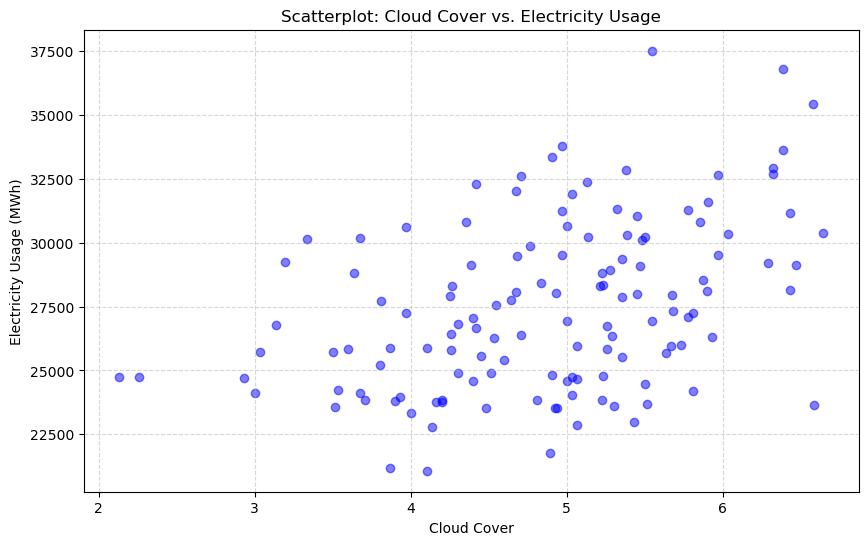

In [93]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
cloud_cover = df_final['cloud_cover']
electricity_usage = df_final['elec_usage']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(cloud_cover, electricity_usage, c='blue', alpha=0.5)
plt.xlabel('Cloud Cover')
plt.ylabel('Electricity Usage (MWh)')
plt.title('Scatterplot: Cloud Cover vs. Electricity Usage')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


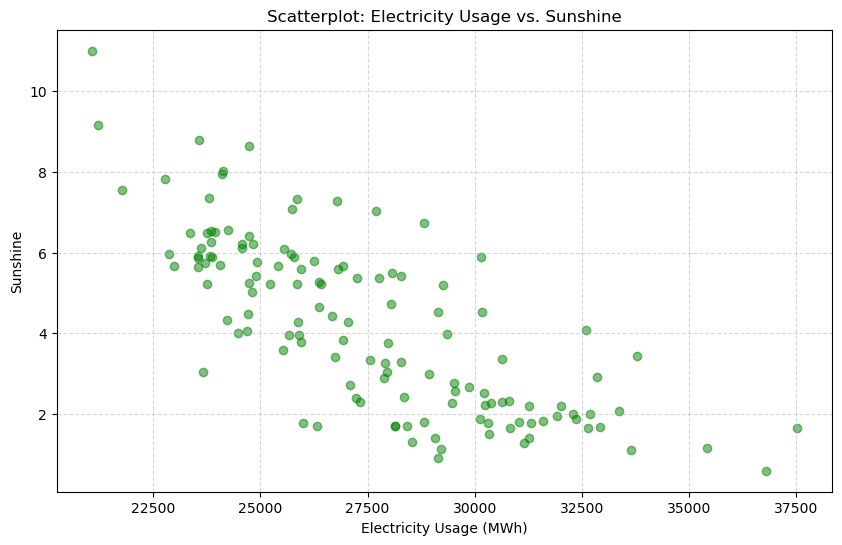

In [94]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
electricity_usage = df_final['elec_usage']
sunshine = df_final['sunshine']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(electricity_usage, sunshine, c='green', alpha=0.5)
plt.xlabel('Electricity Usage (MWh)')
plt.ylabel('Sunshine')
plt.title('Scatterplot: Electricity Usage vs. Sunshine')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


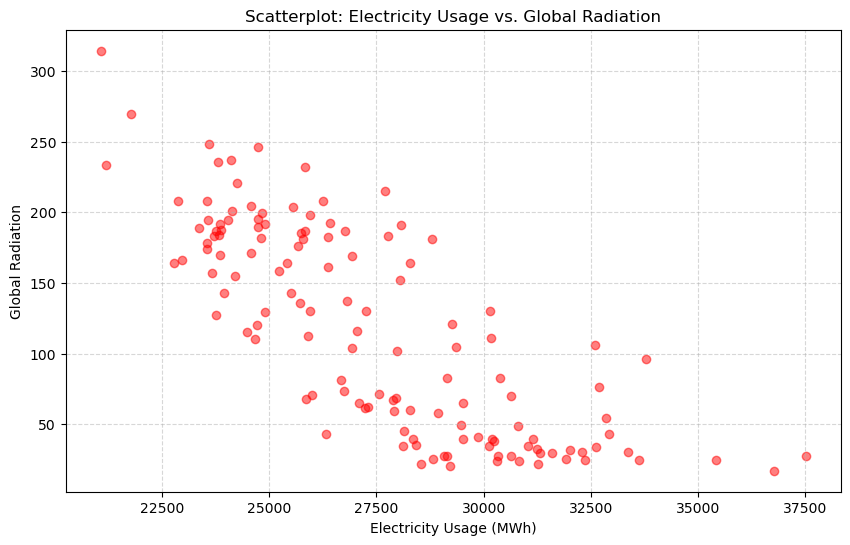

In [95]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
electricity_usage = df_final['elec_usage']
radiation = df_final['global_radiation']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(electricity_usage, radiation, c='red', alpha=0.5)
plt.xlabel('Electricity Usage (MWh)')
plt.ylabel('Global Radiation')
plt.title('Scatterplot: Electricity Usage vs. Global Radiation')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


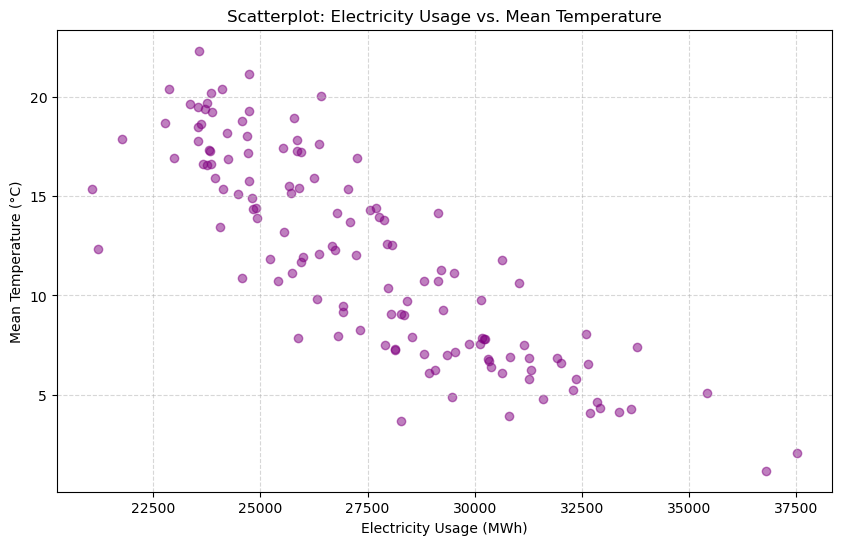

In [96]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
electricity_usage = df_final['elec_usage']
mean_temp = df_final['mean_temp']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(electricity_usage, mean_temp, c='purple', alpha=0.5)
plt.xlabel('Electricity Usage (MWh)')
plt.ylabel('Mean Temperature (°C)')
plt.title('Scatterplot: Electricity Usage vs. Mean Temperature')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


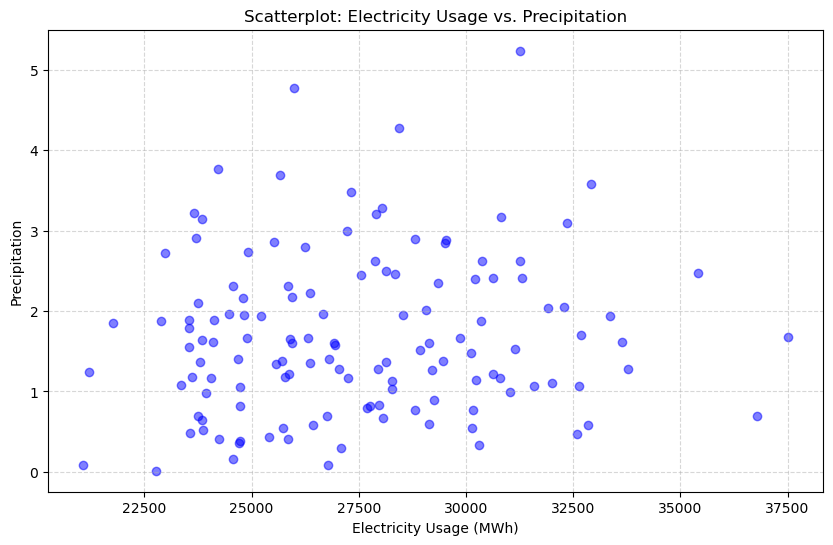

In [97]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
electricity_usage = df_final['elec_usage']
precipitation = df_final['precipitation']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(electricity_usage, precipitation, c='blue', alpha=0.5)
plt.xlabel('Electricity Usage (MWh)')
plt.ylabel('Precipitation')
plt.title('Scatterplot: Electricity Usage vs. Precipitation')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


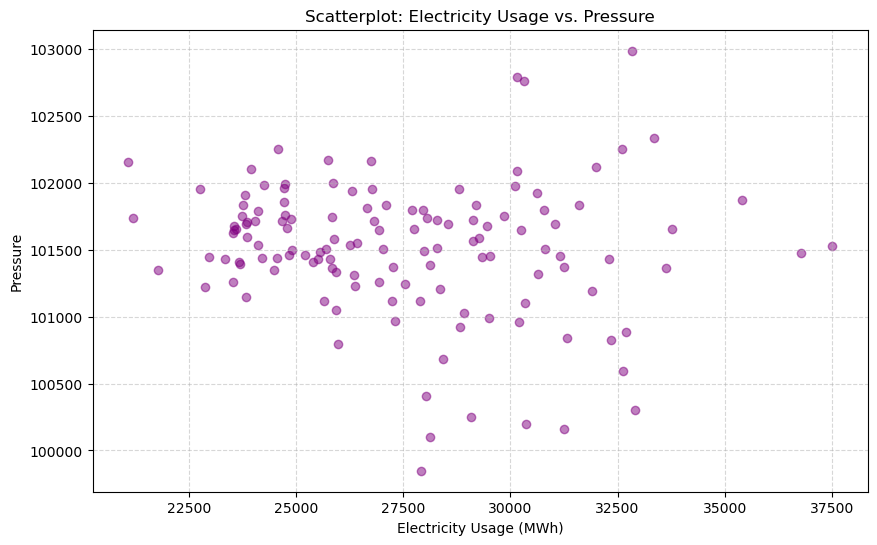

In [98]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
electricity_usage = df_final['elec_usage']
pressure = df_final['pressure']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(electricity_usage, pressure, c='purple', alpha=0.5)
plt.xlabel('Electricity Usage (MWh)')
plt.ylabel('Pressure')
plt.title('Scatterplot: Electricity Usage vs. Pressure')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


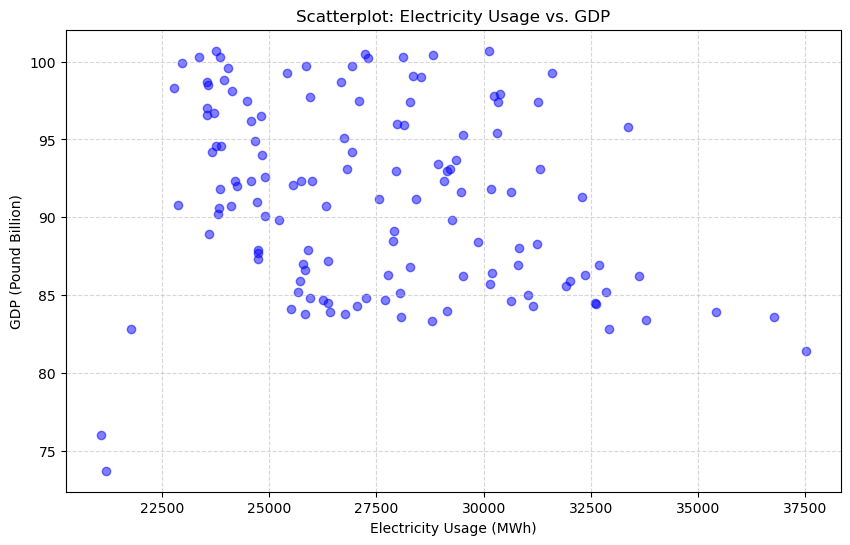

In [99]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
electricity_usage = df_final['elec_usage']
gdp = df_final['GDP']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(electricity_usage, gdp, c='blue', alpha=0.5)
plt.xlabel('Electricity Usage (MWh)')
plt.ylabel('GDP (Pound Billion)')
plt.title('Scatterplot: Electricity Usage vs. GDP')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


## Building the model

Since there are both direct and inverse proportional relationships between the predictor variables and electricity usage,consider using a regression model.

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Prepare data by selecting the relevant columns from df_final and splitting it into training and testing sets

In [101]:
X = df_final[['cloud_cover', 'sunshine', 'global_radiation', 'mean_temp']]
y = df_final['elec_usage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and train a linear regression model

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test set

In [103]:
y_pred = model.predict(X_test)


Evaluate the model's performance

In [104]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2124308.6633393057
R-squared: 0.8246813947621593


## Test the model for few properties

In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

In [108]:
# Example values for testing
test_data = {
    'cloud_cover': 4,
    'sunshine': 3.5,
    'global_radiation': 200,
    'mean_temp': 25,
}

In [109]:
test_df = pd.DataFrame(test_data, index=[0]) #Convert the dictionary into a DataFrame

predicted_elec_usage = model.predict(test_df) #Use trained model to make predictions for these test data points

print("Predicted Electricity Usage:", predicted_elec_usage[0])


Predicted Electricity Usage: 24383.59700319009


# Visualization

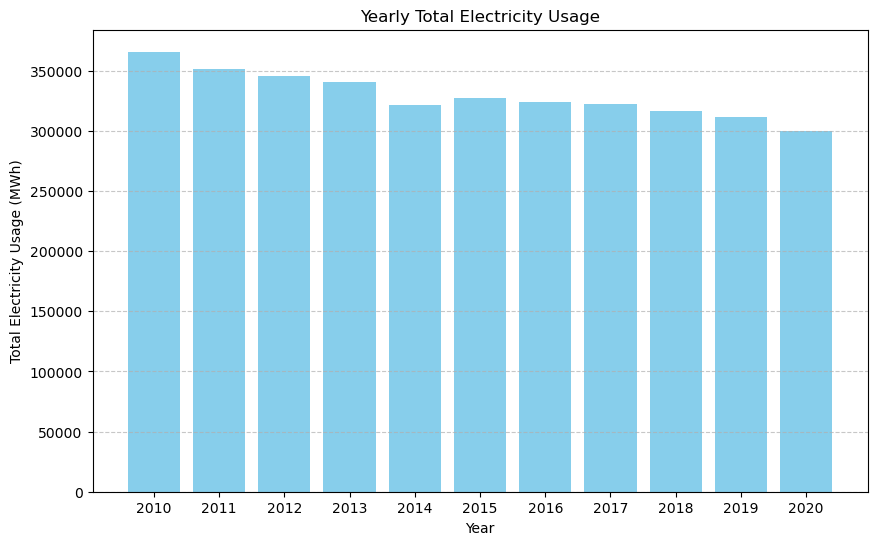

In [69]:
import matplotlib.pyplot as plt

# Group the data by 'year' and calculate the sum of 'elec_usage' for each year
yearly_electricity_usage = df_final.groupby('year')['elec_usage'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(yearly_electricity_usage['year'], yearly_electricity_usage['elec_usage'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Electricity Usage (MWh)')
plt.title('Yearly Total Electricity Usage')
plt.xticks(yearly_electricity_usage['year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

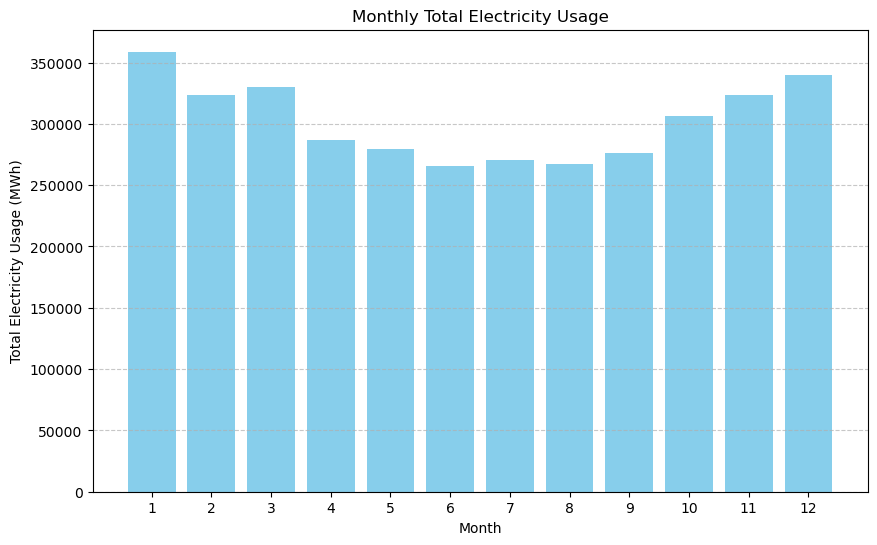

In [73]:
import matplotlib.pyplot as plt

monthly_electricity_usage = df_final.groupby('month')['elec_usage'].sum().reset_index()

plt.figure(figsize=(10, 6)) 
plt.bar(monthly_electricity_usage['month'], monthly_electricity_usage['elec_usage'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Electricity Usage (MWh)')
plt.title('Monthly Total Electricity Usage')
plt.xticks(monthly_electricity_usage['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

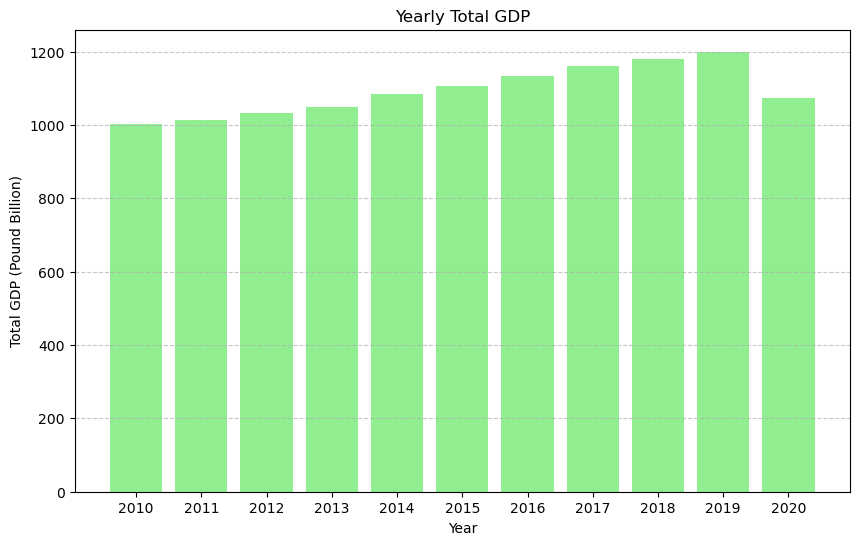

In [74]:
import matplotlib.pyplot as plt

yearly_gdp = df_final.groupby('year')['GDP'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(yearly_gdp['year'], yearly_gdp['GDP'], color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Total GDP (Pound Billion)')
plt.title('Yearly Total GDP')
plt.xticks(yearly_gdp['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

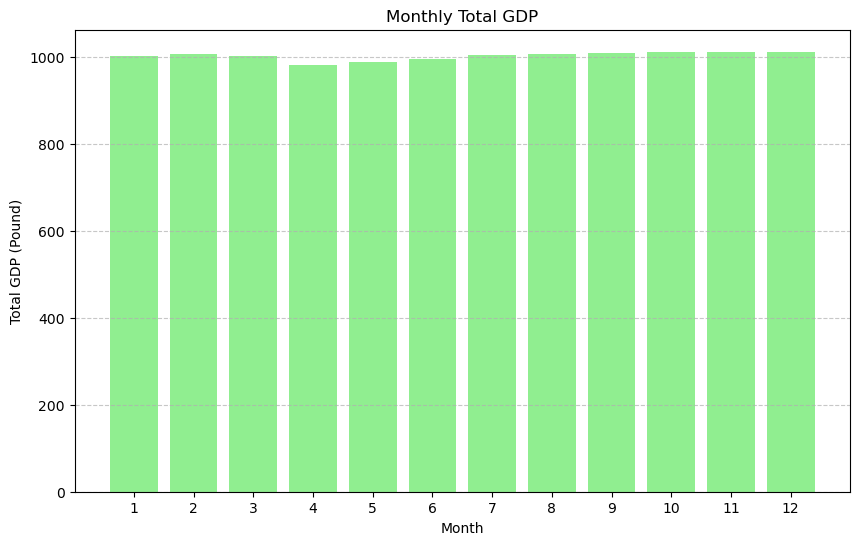

In [75]:
import matplotlib.pyplot as plt

monthly_gdp = df_final.groupby('month')['GDP'].sum().reset_index()

plt.figure(figsize=(10, 6)) 
plt.bar(monthly_gdp['month'], monthly_gdp['GDP'], color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Total GDP (Pound)')
plt.title('Monthly Total GDP')
plt.xticks(monthly_gdp['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

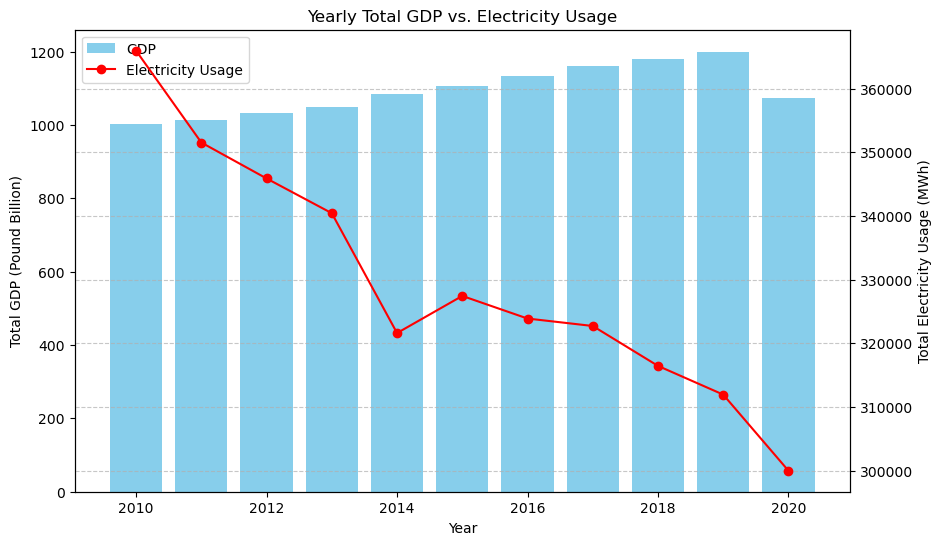

In [76]:
import matplotlib.pyplot as plt

# Group the data by 'year' and calculate the sum of 'GDP' and 'elec_usage' for each year
yearly_data = df_final.groupby('year')[['GDP', 'elec_usage']].sum().reset_index()

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot GDP on the left y-axis (ax1)
ax1.bar(yearly_data['year'], yearly_data['GDP'], color='skyblue', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total GDP (Pound Billion)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis on the right (ax2) for electricity usage
ax2 = ax1.twinx()
ax2.plot(yearly_data['year'], yearly_data['elec_usage'], color='red', marker='o', label='Electricity Usage')
ax2.set_ylabel('Total Electricity Usage (MWh)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set labels and title
plt.title('Yearly Total GDP vs. Electricity Usage')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


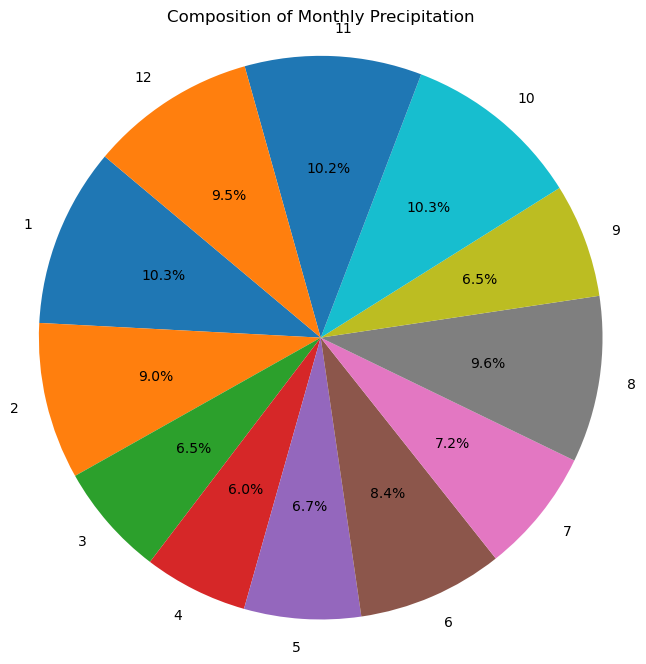

In [77]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'month' and calculate the sum of 'precipitation' for each month
monthly_precipitation = df_final.groupby('month')['precipitation'].sum()

# Calculate the total annual precipitation
total_annual_precipitation = monthly_precipitation.sum()

# Calculate the percentage of total annual precipitation for each month
percentage_precipitation = (monthly_precipitation / total_annual_precipitation) * 100

# Create a pie chart to visualize the composition of monthly precipitation
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(percentage_precipitation, labels=percentage_precipitation.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of Monthly Precipitation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the chart
plt.show()


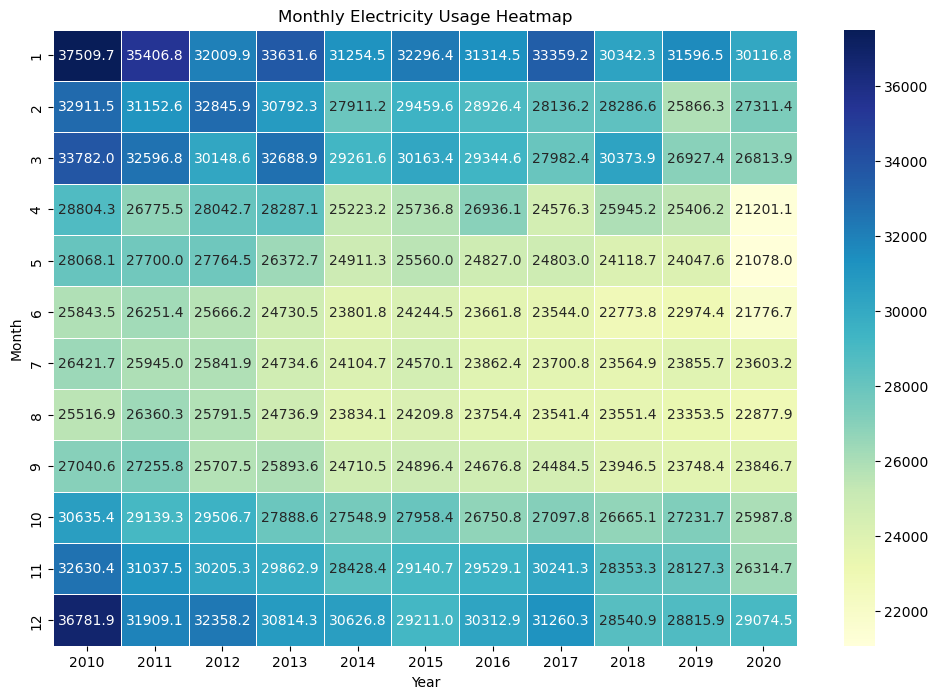

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = df_final.pivot_table(index='month', columns='year', values='elec_usage', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Monthly Electricity Usage Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')

plt.show()

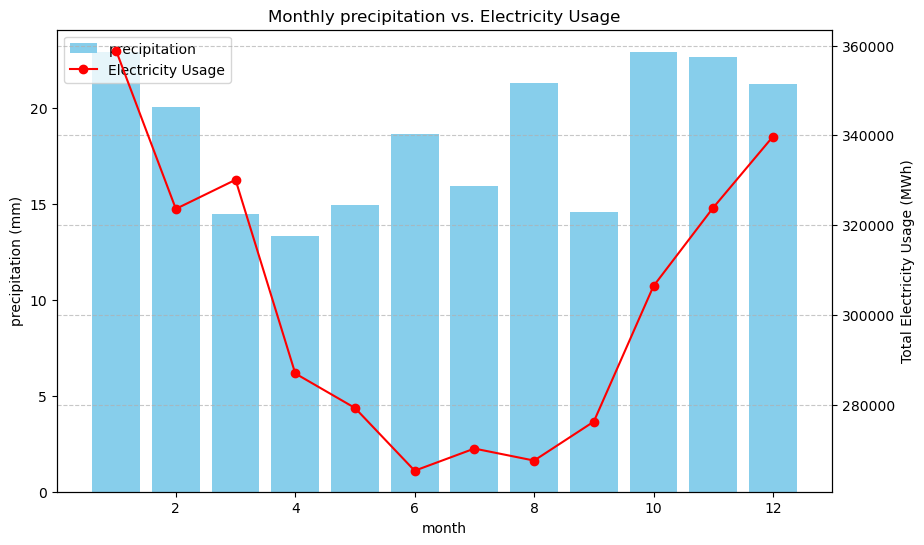

In [79]:
import matplotlib.pyplot as plt


monthly_data = df_final.groupby('month')[['precipitation', 'elec_usage']].sum().reset_index()


fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(monthly_data['month'], monthly_data['precipitation'], color='skyblue', label='precipitation')
ax1.set_xlabel('month')
ax1.set_ylabel('precipitation (mm)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(monthly_data['month'], monthly_data['elec_usage'], color='red', marker='o', label='Electricity Usage')
ax2.set_ylabel('Total Electricity Usage (MWh)', color='black')
ax2.tick_params(axis='y', labelcolor='black')


plt.title('Monthly precipitation vs. Electricity Usage')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

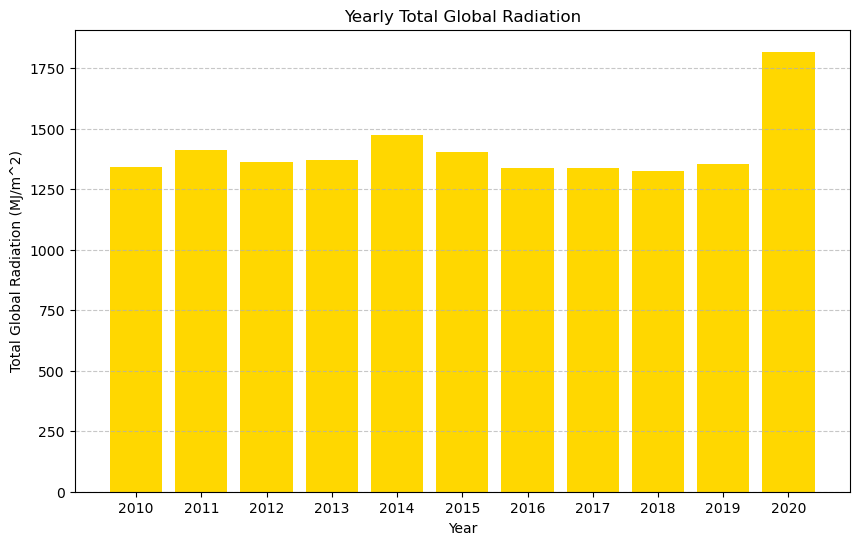

In [80]:
import matplotlib.pyplot as plt

# Group the data by 'year' and calculate the sum of 'global_radiation' for each year
yearly_global_radiation = df_final.groupby('year')['global_radiation'].sum().reset_index()

# Create a bar chart to visualize yearly global radiation
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(yearly_global_radiation['year'], yearly_global_radiation['global_radiation'], color='gold')
plt.xlabel('Year')
plt.ylabel('Total Global Radiation (MJ/m^2)')
plt.title('Yearly Total Global Radiation')
plt.xticks(yearly_global_radiation['year'])  # Set the x-axis ticks to unique years
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


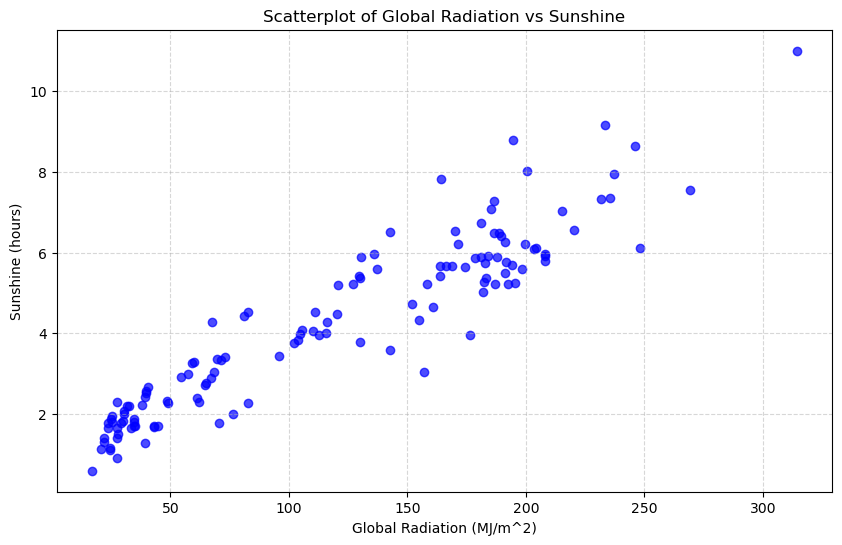

In [81]:
import matplotlib.pyplot as plt

# Extract the 'global_radiation' and 'sunshine' columns from your DataFrame (df_final)
global_radiation = df_final['global_radiation']
sunshine = df_final['sunshine']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(global_radiation, sunshine, color='blue', alpha=0.7)
plt.xlabel('Global Radiation (MJ/m^2)')
plt.ylabel('Sunshine (hours)')
plt.title('Scatterplot of Global Radiation vs Sunshine')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


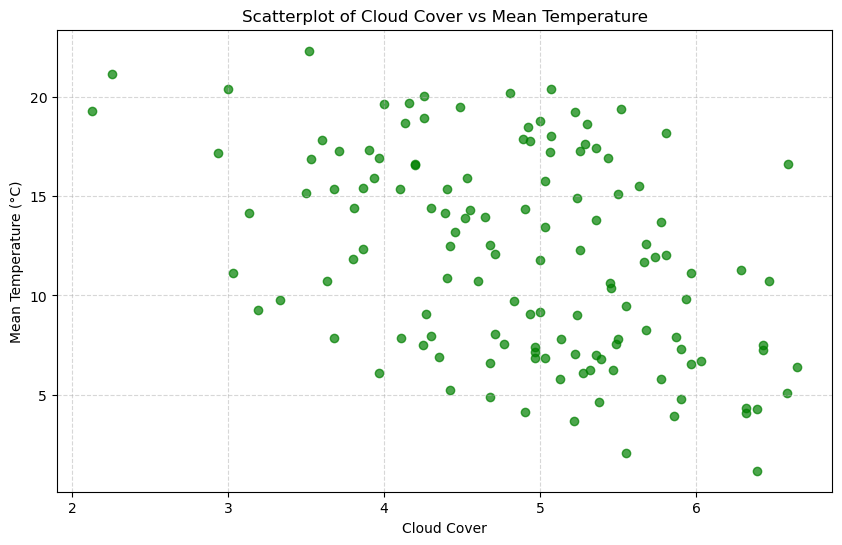

In [82]:
import matplotlib.pyplot as plt

# Extract the 'cloud_cover' and 'mean_temp' columns from your DataFrame (df_final)
cloud_cover = df_final['cloud_cover']
mean_temp = df_final['mean_temp']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(cloud_cover, mean_temp, color='green', alpha=0.7)
plt.xlabel('Cloud Cover')
plt.ylabel('Mean Temperature (°C)')
plt.title('Scatterplot of Cloud Cover vs Mean Temperature')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


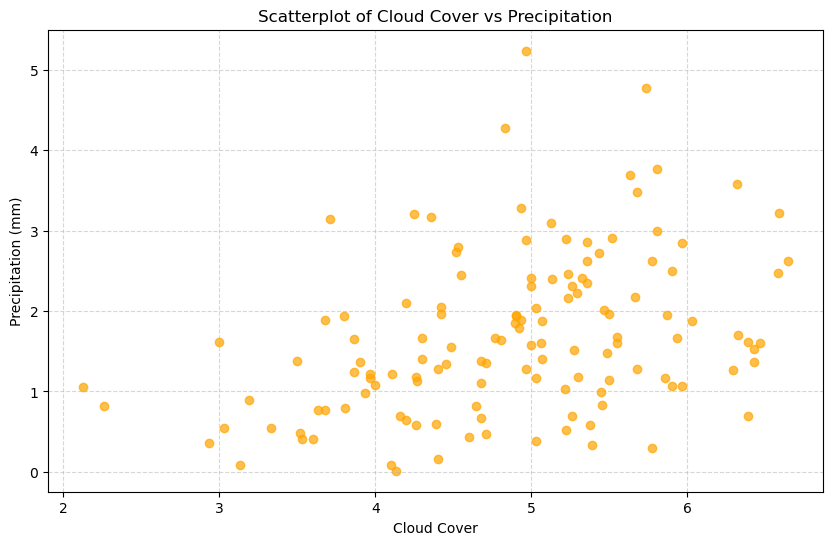

In [83]:
import matplotlib.pyplot as plt

# Extract the 'cloud_cover' and 'precipitation' columns from your DataFrame (df_final)
cloud_cover = df_final['cloud_cover']
precipitation = df_final['precipitation']

# Create a scatterplot chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(cloud_cover, precipitation, color='orange', alpha=0.7)
plt.xlabel('Cloud Cover')
plt.ylabel('Precipitation (mm)')
plt.title('Scatterplot of Cloud Cover vs Precipitation')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


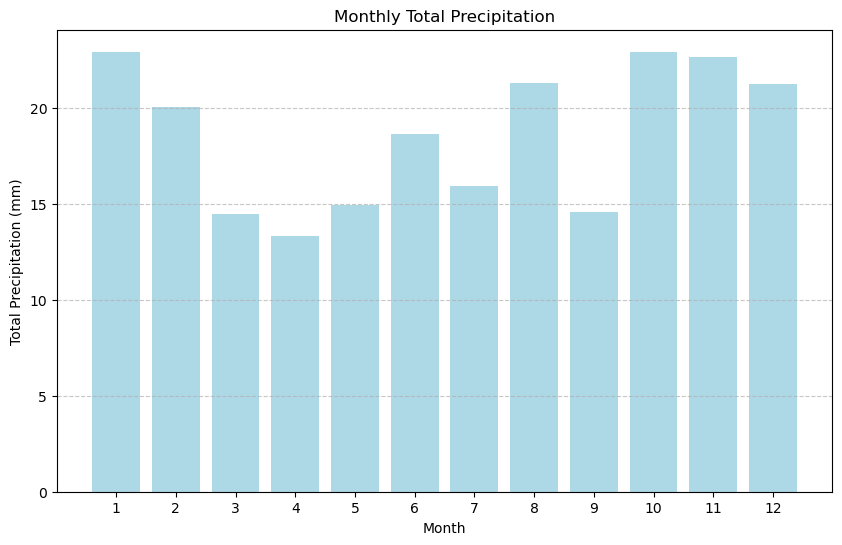

In [84]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'month' and calculate the sum of 'precipitation' for each month
monthly_precipitation = df_final.groupby('month')['precipitation'].sum().reset_index()

# Create a bar chart to visualize monthly precipitation
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(monthly_precipitation['month'], monthly_precipitation['precipitation'], color='lightblue')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.title('Monthly Total Precipitation')
plt.xticks(monthly_precipitation['month'])  # Set the x-axis ticks to unique months
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


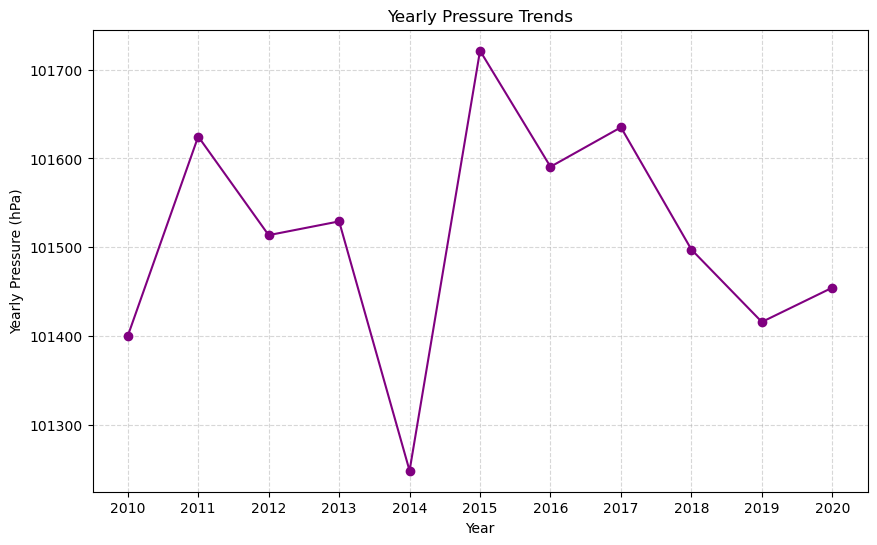

In [85]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'year' and calculate the mean or sum of 'pressure' for each year
yearly_pressure = df_final.groupby('year')['pressure'].mean().reset_index()

# Create a line chart to visualize yearly pressure
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(yearly_pressure['year'], yearly_pressure['pressure'], marker='o', color='purple', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Yearly Pressure (hPa)')
plt.title('Yearly Pressure Trends')
plt.xticks(yearly_pressure['year'])  # Set the x-axis ticks to unique years
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


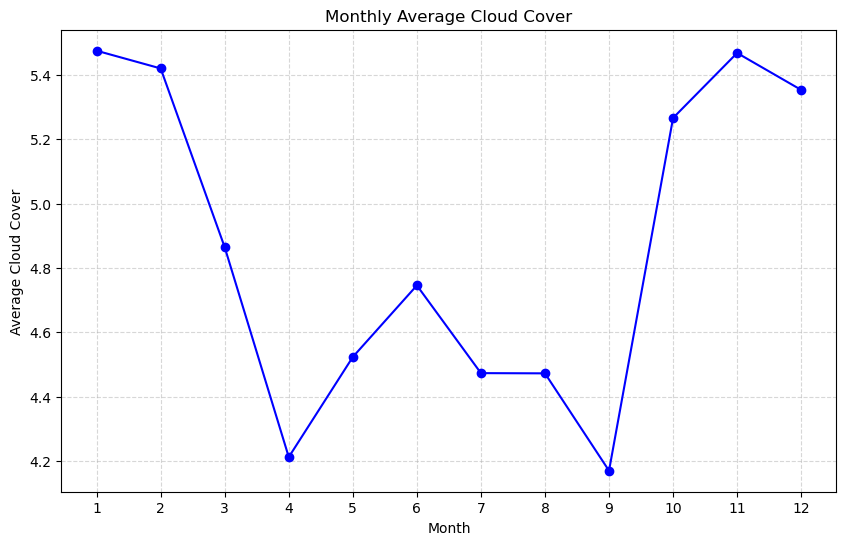

In [86]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'month' and calculate the mean of 'cloud_cover' for each month
monthly_cloud_cover = df_final.groupby('month')['cloud_cover'].mean().reset_index()

# Create a line chart to visualize the monthly average cloud cover
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(monthly_cloud_cover['month'], monthly_cloud_cover['cloud_cover'], marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Cloud Cover')
plt.title('Monthly Average Cloud Cover')
plt.xticks(monthly_cloud_cover['month'])  # Set the x-axis ticks to unique months
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


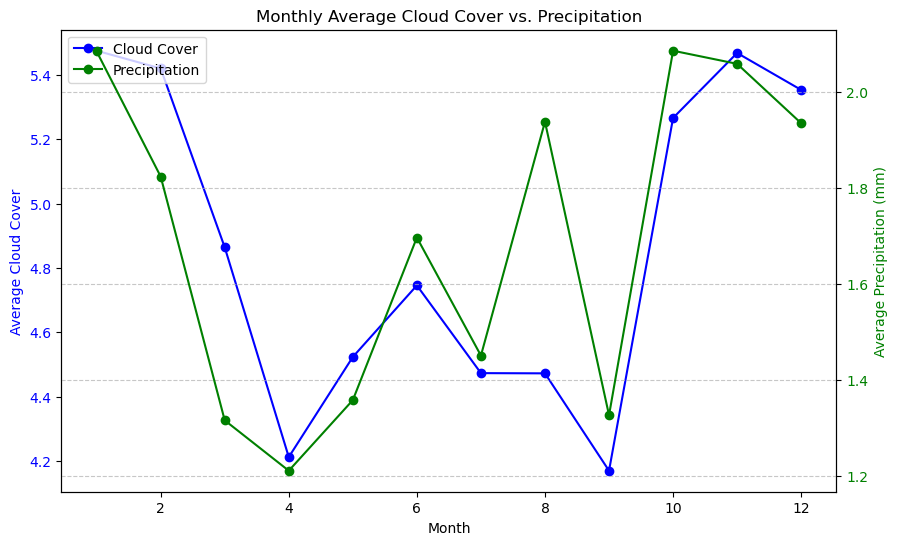

In [87]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'month' and calculate the mean of 'cloud_cover' and 'precipitation' for each month
monthly_cloud_cover = df_final.groupby('month')['cloud_cover'].mean().reset_index()
monthly_precipitation = df_final.groupby('month')['precipitation'].mean().reset_index()

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot monthly average cloud cover on the left y-axis (ax1)
ax1.plot(monthly_cloud_cover['month'], monthly_cloud_cover['cloud_cover'], marker='o', color='blue', label='Cloud Cover')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Cloud Cover', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right (ax2) for monthly average precipitation
ax2 = ax1.twinx()
ax2.plot(monthly_precipitation['month'], monthly_precipitation['precipitation'], marker='o', color='green', label='Precipitation')
ax2.set_ylabel('Average Precipitation (mm)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set labels and title
plt.title('Monthly Average Cloud Cover vs. Precipitation')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


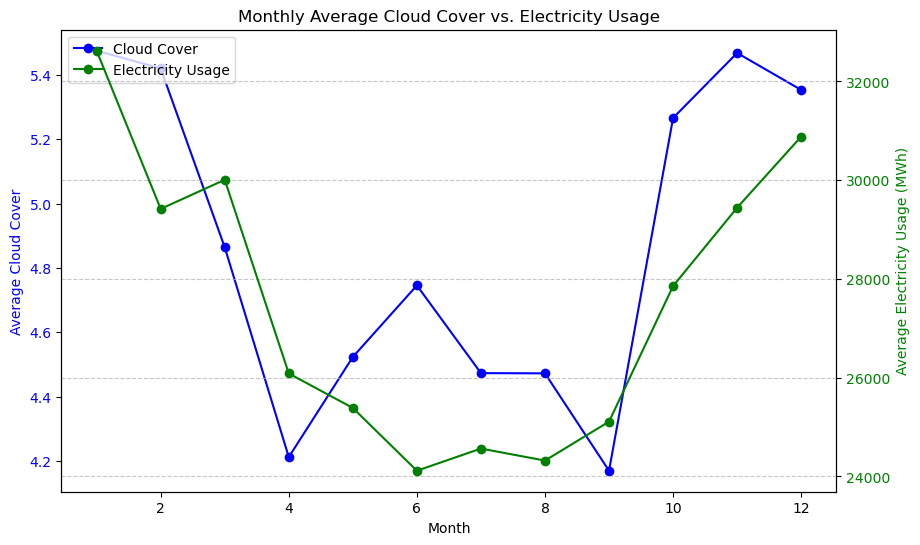

In [88]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'month' and calculate the mean of 'cloud_cover', 'elec_usage', and 'precipitation' for each month
monthly_data = df_final.groupby('month')[['cloud_cover', 'elec_usage']].mean().reset_index()
monthly_precipitation = df_final.groupby('month')['precipitation'].mean().reset_index()

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot monthly average cloud cover on the left y-axis (ax1)
ax1.plot(monthly_data['month'], monthly_data['cloud_cover'], marker='o', color='blue', label='Cloud Cover')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Cloud Cover', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right (ax2) for monthly average electricity usage
ax2 = ax1.twinx()
ax2.plot(monthly_data['month'], monthly_data['elec_usage'], marker='o', color='green', label='Electricity Usage')
ax2.set_ylabel('Average Electricity Usage (MWh)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set labels and title
plt.title('Monthly Average Cloud Cover vs. Electricity Usage')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


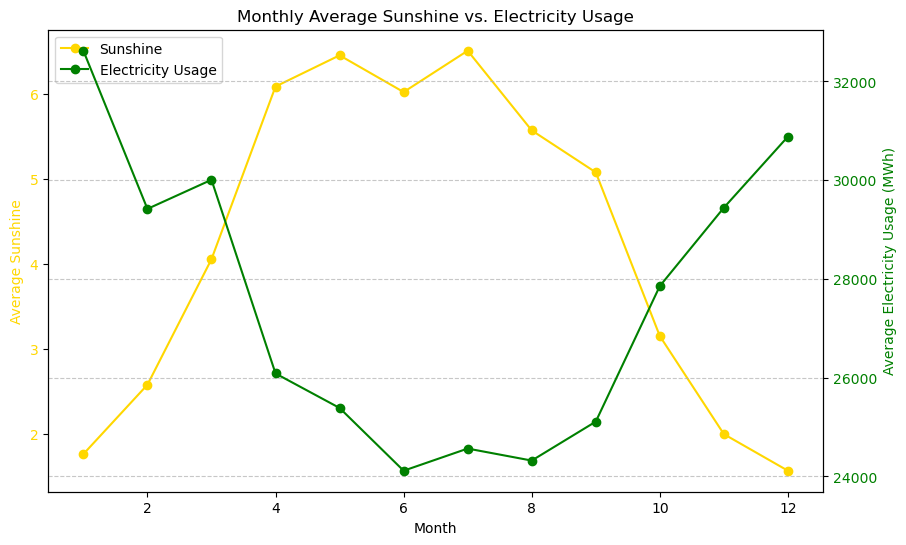

In [89]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'month' and calculate the mean of 'sunshine' and 'elec_usage' for each month
monthly_sunshine = df_final.groupby('month')['sunshine'].mean().reset_index()
monthly_electricity_usage = df_final.groupby('month')['elec_usage'].mean().reset_index()

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot monthly average sunshine on the left y-axis (ax1)
ax1.plot(monthly_sunshine['month'], monthly_sunshine['sunshine'], marker='o', color='gold', label='Sunshine')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sunshine', color='gold')
ax1.tick_params(axis='y', labelcolor='gold')

# Create a second y-axis on the right (ax2) for monthly average electricity usage
ax2 = ax1.twinx()
ax2.plot(monthly_electricity_usage['month'], monthly_electricity_usage['elec_usage'], marker='o', color='green', label='Electricity Usage')
ax2.set_ylabel('Average Electricity Usage (MWh)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set labels and title
plt.title('Monthly Average Sunshine vs. Electricity Usage')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


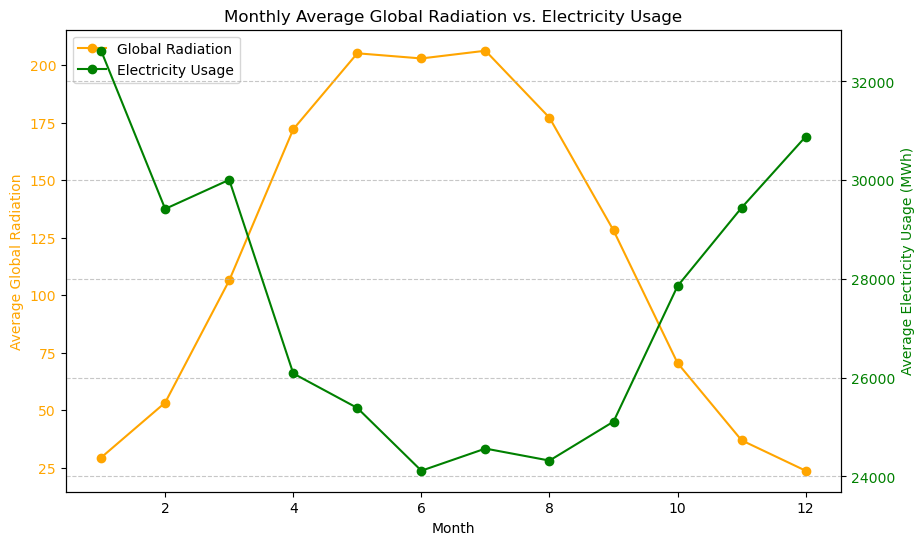

In [90]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'month' and calculate the mean of 'global_radiation' and 'elec_usage' for each month
monthly_radiation = df_final.groupby('month')['global_radiation'].mean().reset_index()
monthly_electricity_usage = df_final.groupby('month')['elec_usage'].mean().reset_index()

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot monthly average global radiation on the left y-axis (ax1)
ax1.plot(monthly_radiation['month'], monthly_radiation['global_radiation'], marker='o', color='orange', label='Global Radiation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Global Radiation', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis on the right (ax2) for monthly average electricity usage
ax2 = ax1.twinx()
ax2.plot(monthly_electricity_usage['month'], monthly_electricity_usage['elec_usage'], marker='o', color='green', label='Electricity Usage')
ax2.set_ylabel('Average Electricity Usage (MWh)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set labels and title
plt.title('Monthly Average Global Radiation vs. Electricity Usage')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


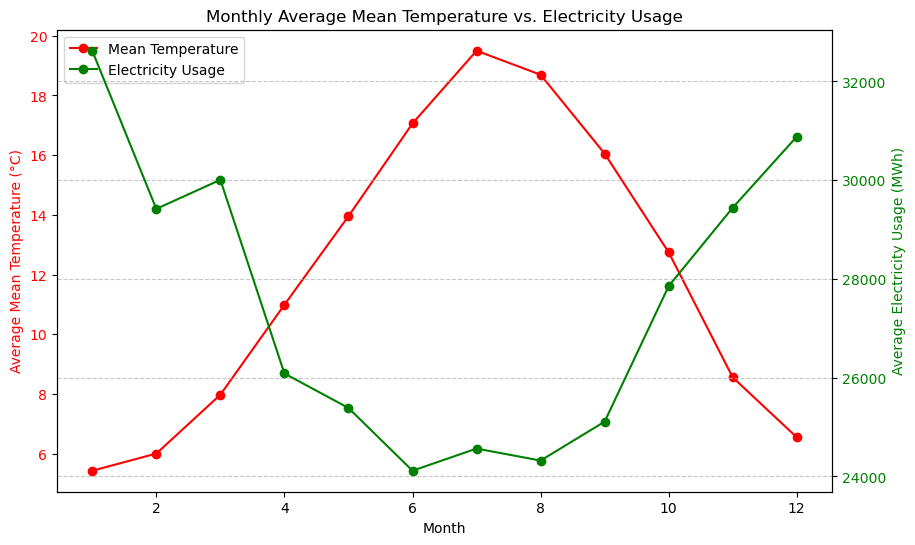

In [91]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'month' and calculate the mean of 'mean_temp' and 'elec_usage' for each month
monthly_mean_temp = df_final.groupby('month')['mean_temp'].mean().reset_index()
monthly_electricity_usage = df_final.groupby('month')['elec_usage'].mean().reset_index()

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot monthly average mean temperature on the left y-axis (ax1)
ax1.plot(monthly_mean_temp['month'], monthly_mean_temp['mean_temp'], marker='o', color='red', label='Mean Temperature')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Mean Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis on the right (ax2) for monthly average electricity usage
ax2 = ax1.twinx()
ax2.plot(monthly_electricity_usage['month'], monthly_electricity_usage['elec_usage'], marker='o', color='green', label='Electricity Usage')
ax2.set_ylabel('Average Electricity Usage (MWh)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set labels and title
plt.title('Monthly Average Mean Temperature vs. Electricity Usage')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


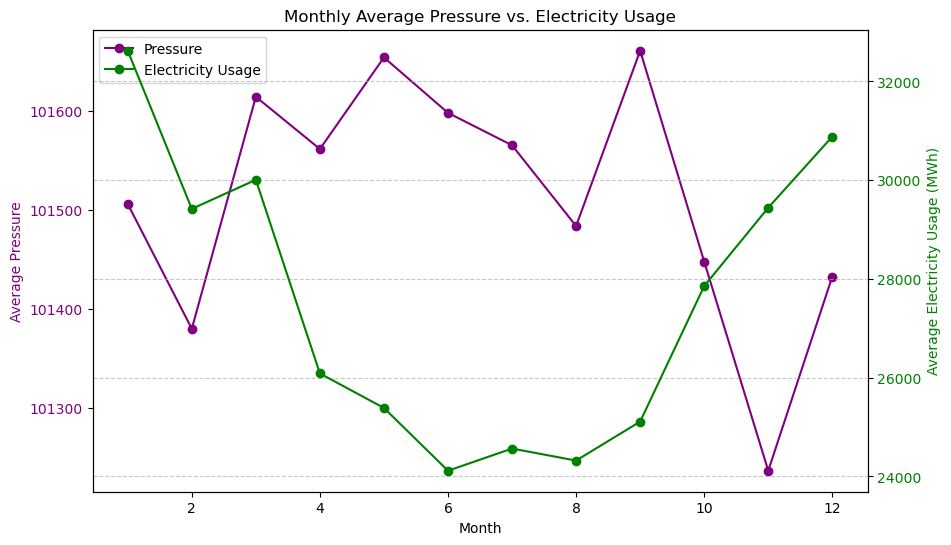

In [92]:
import matplotlib.pyplot as plt

# Assuming 'df_final' is your DataFrame containing the data
# Group the data by 'month' and calculate the mean of 'pressure' and 'elec_usage' for each month
monthly_pressure = df_final.groupby('month')['pressure'].mean().reset_index()
monthly_electricity_usage = df_final.groupby('month')['elec_usage'].mean().reset_index()

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot monthly average pressure on the left y-axis (ax1)
ax1.plot(monthly_pressure['month'], monthly_pressure['pressure'], marker='o', color='purple', label='Pressure')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Pressure', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Create a second y-axis on the right (ax2) for monthly average electricity usage
ax2 = ax1.twinx()
ax2.plot(monthly_electricity_usage['month'], monthly_electricity_usage['elec_usage'], marker='o', color='green', label='Electricity Usage')
ax2.set_ylabel('Average Electricity Usage (MWh)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set labels and title
plt.title('Monthly Average Pressure vs. Electricity Usage')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
